In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Embedding,SimpleRNN

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("sentiment_analysis.csv")

In [3]:
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [4]:
text = df["text"].tolist()

In [5]:
text

['What a great day!!! Looks like dream.',
 'I feel sorry, I miss you here in the sea beach',
 "Don't angry me",
 'We attend in the class just for listening teachers reading on slide. Just Nonsence  ',
 'Those who want to go, let them go',
 'Its night 2 am, feeling neutral',
 '2 am feedings for the baby are fun when he is all smiles and coos',
 'Soooo high',
 ' Both of you',
 'Today first time I arrive in the boat. Its amazing journey',
 'Love is something like E=MC^2 rules',
 'I really really like the song Cardigan by Taylor Swift',
 'My Sharpie is running DANGERously low on ink',
 'i want to go to music tonight but i lost my voice.',
 'Always somewhere I miss you where I have been',
 "Don't distrube me",
 "I don't care, who are you and what can you do",
 'i`ve been sick for the past few days ',
 "I'm come back home, my past job, its really good time for me",
 'I will never fall in love until I found you',
 ' oh Maya, I`m so sorry!!  I hope you find her soon!! ',
 'Playing with kids, i

In [6]:
sentiment = df["sentiment"].tolist()

In [7]:
sentiment

['positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 '

In [8]:
df["sentiment"].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [9]:
tokenize = Tokenizer()

In [10]:
tokenize.fit_on_texts(text)

In [11]:
text_seq = tokenize.texts_to_sequences(text)

In [12]:
text_seq

[[32, 5, 97, 16, 109, 33, 403],
 [1, 83, 71, 1, 63, 4, 90, 11, 3, 290, 291],
 [125, 404, 13],
 [35, 405, 11, 3, 221, 24, 9, 147, 406, 407, 21, 408, 24, 409],
 [148, 126, 52, 2, 36, 110, 149, 36],
 [48, 77, 64, 47, 111, 410],
 [64, 47, 411, 9, 3, 150, 17, 98, 78, 84, 10, 40, 412, 6, 413],
 [151, 414],
 [292, 19, 4],
 [41, 127, 65, 1, 415, 11, 3, 416, 48, 59, 417],
 [26, 10, 222, 33, 418, 419, 64, 420],
 [1, 42, 42, 33, 3, 152, 421, 91, 293, 422],
 [7, 423, 10, 294, 424, 425, 21, 426],
 [1, 52, 2, 36, 2, 295, 99, 20, 1, 223, 7, 224],
 [100, 427, 1, 63, 4, 225, 1, 18, 128],
 [125, 428, 13],
 [1, 125, 429, 126, 17, 4, 6, 32, 53, 4, 43],
 [1, 129, 128, 226, 9, 3, 153, 183, 92],
 [66, 112, 45, 60, 7, 153, 296, 48, 42, 49, 65, 9, 13],
 [1, 56, 184, 297, 11, 26, 154, 1, 185, 4],
 [130, 430, 1, 15, 27, 71, 1, 93, 4, 186, 72, 131],
 [155, 29, 227, 48, 59],
 [10, 228, 3, 298, 9, 72, 132, 126, 10, 431, 229, 41],
 [1, 432, 2, 433, 7, 434, 6, 435, 1, 436, 11, 3, 437, 438, 48, 42, 439],
 [187, 13, 1,

In [13]:
max_len = max([len(i) for i in text_seq])

In [14]:
max_len

31

In [15]:
word_index = len(tokenize.word_index)+1

In [16]:
word_index

1438

In [17]:
pad_text = sequence.pad_sequences(text_seq,maxlen=max_len,padding="post")

In [18]:
pad_text

array([[  32,    5,   97, ...,    0,    0,    0],
       [   1,   83,   71, ...,    0,    0,    0],
       [ 125,  404,   13, ...,    0,    0,    0],
       ...,
       [1430,   40,    7, ...,    0,    0,    0],
       [1433,    4, 1434, ...,    0,    0,    0],
       [ 203,    1,  394, ...,    0,    0,    0]], dtype=int32)

In [19]:
df["sentiment"].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [20]:
# label incoder
# get feature name out

In [21]:
labels = np.array(df["sentiment"].map({"negative":0,
             "positive":1,
             "neutral":2}))

In [22]:
labels

array([1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0,
       0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2,
       0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2,
       1, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1,
       1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1,

In [23]:
np.array(sentiment)

array(['positive', 'positive', 'negative', 'negative', 'negative',
       'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral',
       'positive', 'negative', 'negative', 'neutral', 'negative',
       'negative', 'neutral', 'positive', 'positive', 'neutral',
       'positive', 'neutral', 'negative', 'neutral', 'positive',
       'negative', 'negative', 'neutral', 'neutral', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'positive',
       'negative', 'neutral', 'negative', 'positive', 'neutral',
       'negative', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'negative', 'positive', 'neutral', 'neutral', 'negative',
       'negative', 'neutral', 'neutral', 'negative', 'negative',
       'positive', 'neutral', 'positive', 'positive', 'positive',
       'neutral', 'positive', 'positive', 'neutral', 'positive',
       'positive', 'negative', 'negative', 'negative', 'neutral',
       'positive', 'neutral', 'neutral', 'positive', 'neutral',


In [24]:
model = Sequential([
    Embedding(word_index,100,input_length = max_len),
    SimpleRNN(100),
    Dense(10,activation="relu"),
    Dense(3,activation="softmax")
    ])

In [25]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
model.fit(pad_text,labels,epochs=100,verbose=True)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3768 - loss: 1.0926
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7128 - loss: 0.8061
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8780 - loss: 0.4784
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9474 - loss: 0.1941
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9894 - loss: 0.0688
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9957 - loss: 0.0278
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9995 - loss: 0.0133
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9982 - loss: 0.0113
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9979 - loss: 0.0126
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9992 - loss: 0.0058
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9949 - loss: 0.0169
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

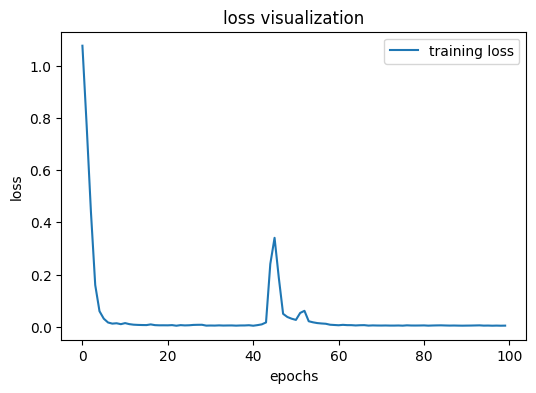

In [27]:
plt.figure(figsize=(6,4))
plt.plot(model.history.history["loss"],label="training loss")
plt.legend()
plt.title("loss visualization")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

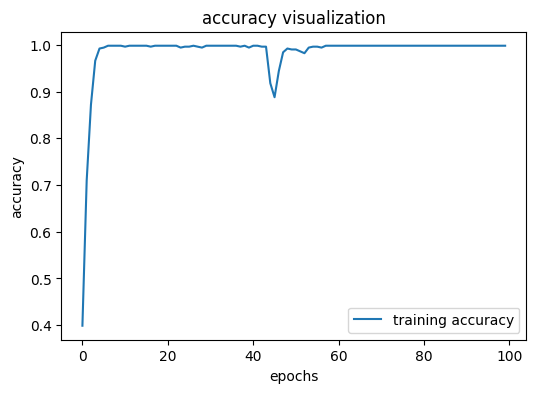

In [28]:
plt.figure(figsize=(6,4))
plt.plot(model.history.history["accuracy"],label="training accuracy")
plt.legend()
plt.title("accuracy visualization")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [29]:
def sentiment_analysis(text):
    text_seq= tokenize.texts_to_sequences([text])
    pad_text = sequence.pad_sequences(text_seq,maxlen=max_len,padding="post")
    pred = model.predict(pad_text)
    # Convert prediction to class label
    pred_class_index = np.argmax(pred,axis=1)[0]
    sentiment_dict = {0: 'negative', 1: 'positive', 2: 'neutral'}
    return sentiment_dict[pred_class_index]

In [30]:
text1 = "This is a great day!"

In [31]:
sentiment_analysis(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


'negative'

In [32]:
text2 = "yesterdays india vs pakistan match was very entertaining"

In [33]:
sentiment_analysis(text2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


'positive'

In [34]:
text3 = "I am very happy today, because today's my father's birthday"

In [35]:
sentiment_analysis(text3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


'positive'

In [36]:
text4 = "dont touch me , otherwise i will hit you back hardly"

In [37]:
sentiment_analysis(text4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


'negative'

In [52]:
text6 = "dont come to me, i am very bad boy,i will kill you "
sentiment_analysis(text6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


'neutral'

In [38]:
def sentiment(text):
    text_seq= tokenize.texts_to_sequences(text)
    pad_text = sequence.pad_sequences(text_seq,maxlen=max_len,padding="post")
    pred = model.predict(pad_text)
    return pred

In [39]:
pred = sentiment(text4)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 


In [40]:
len(pred)

52

In [41]:
pred

array([[5.5619985e-01, 4.3161184e-01, 1.2188330e-02],
       [2.8440412e-03, 5.7698405e-01, 4.2017198e-01],
       [6.6063687e-04, 2.8185906e-02, 9.7115344e-01],
       [1.8413836e-03, 3.9784050e-01, 6.0031813e-01],
       [1.5459301e-04, 1.7063868e-03, 9.9813902e-01],
       [1.8413836e-03, 3.9784050e-01, 6.0031813e-01],
       [2.8440412e-03, 5.7698405e-01, 4.2017198e-01],
       [1.4465049e-05, 3.4410707e-05, 9.9995112e-01],
       [1.5459301e-04, 1.7063868e-03, 9.9813902e-01],
       [1.5459301e-04, 1.7063868e-03, 9.9813902e-01],
       [1.5459301e-04, 1.7063868e-03, 9.9813902e-01],
       [4.9912546e-02, 1.5139164e-02, 9.3494821e-01],
       [1.6641978e-03, 9.8230541e-01, 1.6030405e-02],
       [1.5459301e-04, 1.7063868e-03, 9.9813902e-01],
       [1.5459301e-04, 1.7063868e-03, 9.9813902e-01],
       [1.5459301e-04, 1.7063868e-03, 9.9813902e-01],
       [2.8440412e-03, 5.7698405e-01, 4.2017198e-01],
       [1.8413836e-03, 3.9784050e-01, 6.0031813e-01],
       [1.5459301e-04, 1.706

In [51]:
# def sentiment(text):
#     text_seq= tokenize.texts_to_sequences(text)
#     pad_text = sequence.pad_sequences(text_seq,maxlen=max_len,padding="post")
#     pred = model.predict(pad_text)
#     pred_class_index = np.argmax(pred,axis=1)
#     mean = round(np.mean(pred_class_index))
#     sentiment_dict = {0: 'negative', 1: 'positive', 2: 'neutral'}
#     return sentiment_dict[mean]